In [1]:
import pandas as pd
import numpy as np
from utils import plot_hist

In [2]:
data = pd.read_pickle('extracted_data/TEST9_global_v4_all_normalized')

In [3]:
data.keys()

Index(['event', 'genWeight', 'charge_1', 'charge_2', 'charge_3', 'pt_1',
       'pt_2', 'pt_3', 'pt_MET', 'eta_1', 'eta_2', 'eta_3', 'mass_1', 'mass_2',
       'mass_3', 'deltaphi_12', 'deltaphi_13', 'deltaphi_23', 'deltaphi_1MET',
       'deltaphi_2MET', 'deltaphi_3MET', 'deltaphi_1(23)', 'deltaphi_2(13)',
       'deltaphi_3(12)', 'deltaphi_MET(12)', 'deltaphi_MET(13)',
       'deltaphi_MET(23)', 'deltaphi_1(2MET)', 'deltaphi_1(3MET)',
       'deltaphi_2(1MET)', 'deltaphi_2(3MET)', 'deltaphi_3(1MET)',
       'deltaphi_3(2MET)', 'deltaeta_12', 'deltaeta_13', 'deltaeta_23',
       'deltaeta_1(23)', 'deltaeta_2(13)', 'deltaeta_3(12)', 'deltaR_12',
       'deltaR_13', 'deltaR_23', 'deltaR_1(23)', 'deltaR_2(13)',
       'deltaR_3(12)', 'pt_123', 'mt_12', 'mt_13', 'mt_23', 'mt_1MET',
       'mt_2MET', 'mt_3MET', 'mt_1(23)', 'mt_2(13)', 'mt_3(12)', 'mt_MET(12)',
       'mt_MET(13)', 'mt_MET(23)', 'mt_1(2MET)', 'mt_1(3MET)', 'mt_2(1MET)',
       'mt_2(3MET)', 'mt_3(1MET)', 'mt_3(2MET)', 'mass

In [4]:
# variables_label = [r"$\Delta R_{\mu\tau_1}$", r"$\Delta R_{\mu\tau_2}$", r"$\sum_{i\in \{\mu,\tau_1,\tau_2\}}\vec{p}_{T}^{i}$", r"$m_{T}^{\tau\tau}$", r"$M_{T}^{total}$"]
input_vars = ['pt_1','pt_2', 'pt_3', 'pt_MET', 'eta_1', 'eta_2', 'eta_3', 'mass_1', 'mass_2',
       'mass_3', 'deltaphi_12', 'deltaphi_13', 'deltaphi_23', 'deltaphi_1MET',
       'deltaphi_2MET', 'deltaphi_3MET', 'deltaphi_1(23)', 'deltaphi_2(13)',
       'deltaphi_3(12)', 'deltaphi_MET(12)', 'deltaphi_MET(13)',
       'deltaphi_MET(23)', 'deltaphi_1(2MET)', 'deltaphi_1(3MET)',
       'deltaphi_2(1MET)', 'deltaphi_2(3MET)', 'deltaphi_3(1MET)',
       'deltaphi_3(2MET)', 'deltaeta_12', 'deltaeta_13', 'deltaeta_23',
       'deltaeta_1(23)', 'deltaeta_2(13)', 'deltaeta_3(12)', 'deltaR_12',
       'deltaR_13', 'deltaR_23', 'deltaR_1(23)', 'deltaR_2(13)',
       'deltaR_3(12)', 'pt_123', 'mt_12', 'mt_13', 'mt_23', 'mt_1MET',
       'mt_2MET', 'mt_3MET', 'mt_1(23)', 'mt_2(13)', 'mt_3(12)', 'mt_MET(12)',
       'mt_MET(13)', 'mt_MET(23)', 'mt_1(2MET)', 'mt_1(3MET)', 'mt_2(1MET)',
       'mt_2(3MET)', 'mt_3(1MET)', 'mt_3(2MET)', 'mass_12', 'mass_13',
       'mass_23', 'mass_123', 'Mt_tot', 'HNL_CM_angle_with_MET_1',
       'HNL_CM_angle_with_MET_2', 'W_CM_angle_to_plane_1',
       'W_CM_angle_to_plane_2', 'W_CM_angle_to_plane_with_MET_1',
       'W_CM_angle_to_plane_with_MET_2', 'HNL_CM_mass_1', 'HNL_CM_mass_2',
       'HNL_CM_mass_with_MET_1', 'HNL_CM_mass_with_MET_2', 'W_CM_angle_12',
       'W_CM_angle_13', 'W_CM_angle_23', 'W_CM_angle_1MET', 'W_CM_angle_2MET',
       'W_CM_angle_3MET']
# variables_label = [r"p_{T,1}", r"p_{T,2}", r"p_{T,3}", r"p_{T,MET}", r"$\eta_1$", r"$\eta_2$", r"$\eta_3$", r"$m_1$", r"$m_1$", r"$m_1$", 
#                    r"$\Delta\phi_{1,2}$", r"$\Delta\phi_{1,3}$", r"$\Delta\phi_{2,3}$", r"$\Delta\phi_{1,MET}$", r"$\Delta\phi_{2,MET}$", r"$\Delta\phi_{3,MET}$", 
#                    r"$\Delta\phi_{1,2+3}$", r"$\Delta\phi_{2,1+3}$", r"$\Delta\phi_{3,1+2}$", r"$\Delta\phi_{MET,1+2}$", r"$\Delta\phi_{MET,1+3}$", r"$\Delta\phi_{MET,2+3}$", 
#                    r"$\Delta\phi_{1,2+MET}$", r"$\Delta\phi_{1,3+MET}$", r"$\Delta\phi_{2,1+MET}$", r"$\Delta\phi_{2,3+MET}$", r"$\Delta\phi_{3,1+MET}$", r"$\Delta\phi_{3,2+MET}$", 
#                    r"$\Delta\eta_{1,2}$", r"$\Delta\eta_{1,3}$", r"$\Delta\eta_{2,3}$",
#                    r"$\Delta\eta_{1,2+3}$", r"$\Delta\eta_{2,1+3}$", r"$\Delta\eta_{3,1+2}$",
#                    r"$\Delta R_{1,2}$", r"$\Delta R_{1,3}$", r"$\Delta R_{2,3}$", 
#                    r"$\Delta R_{1,2+3}$", r"$\Delta R_{2,1+3}$", r"$\Delta R_{3,1+2}$", 
#                    r"$p_{T}^{\sum_{1,2,3}}$ [GeV/c]",... r"$m_{T}^{\tau\tau}$ [GeV/c$^2$]", r"$m_{T}^{\tau_1\mu}$ [GeV/c$^2$]", r"$m_{T}^{\tau_2\mu}$ [GeV/c$^2$]", r"$M_{T}^{total}$ [GeV/c$^2$]"]



In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({"font.size": 16, "font.family": "serif"})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

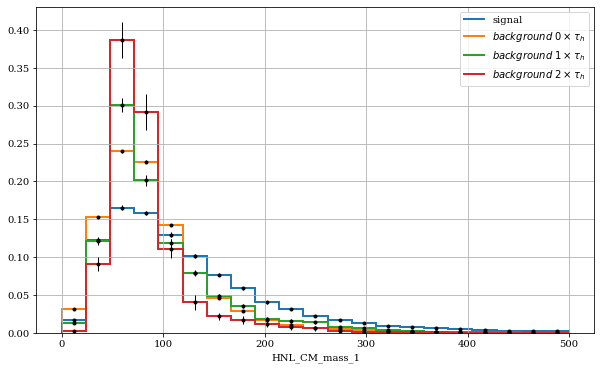

In [9]:
input_var_idx = input_vars.index('HNL_CM_mass_1')
bin_edges = np.linspace(0,500,22)
fig = plot_hist(data, input_vars[input_var_idx], input_vars[input_var_idx], bin_edges)[0]